# Tema  6. Aprendizaje supervisado. Regresión y clasificación con árboles de decisión.

## Acceder datos en google colab
Ejecuta esta celda **solo** si estas usando google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Ejemplo 6.1 Predicción resultado mayoria demócrata o republicano elecciones US 2020

En este ejemplo intentaremos predecir si ha ganado el pártido demócrata sobre el repúblicano por condados en las elecciones de 2020 en US.

El dataset está tomado de

https://www.kaggle.com/datasets/essarabi/ultimate-us-election-dataset

### Cargamos los datos

Cargamos los datos desde el fichero local.

In [3]:
# cargar los datos
# cambia la ruta si no estas en colab
df = pd.read_csv('drive/MyDrive/Colab Notebooks/dataset-US_Election_v1.csv')

# veamos como se han cargado los datos
df.head()

,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


### Selección de variables
Para este ejemplo seleccionamos las variables que nos interesan

In [4]:
df_data = df[['2020 Republican vote %','2020 Democrat vote %',
              'Population with less than 9th grade education',
              'Population with 9th to 12th grade education, no diploma',
              'High School graduate and equivalent',
              'Some College,No Degree',
              'Associates Degree',
              'Bachelors Degree',
              'Graduate or professional degree',
              'Median income (dollars)',
              'NH-White percentage',
              'Percentage engaged in Management, business, science, and arts occupations',
              'Percentage engaged in Service Occupations',
              'Percentage engaged in Sales and Office',
              'Percentage engaged in Resources and Construction',
              'Percentage engaged in Transportation']].copy()

### Transformación de variables
- Renombramos algunas de las variables para acortar los nombres.
- Transformamos algunas variables de texto con `%` a números reales.
- Limpiamos la variable `Income` eliminando las comas de miles `, ` y un valor con guión.

In [5]:
df_data.rename(columns={
    'Population with less than 9th grade education': 'Edu 9th',
    'Population with 9th to 12th grade education, no diploma': 'Edu 12th',
    'High School graduate and equivalent': 'Edu: High School',
    'Some College,No Degree': 'Edu No degree',
    'Associates Degree' : 'Edu Asso.',
    'Bachelors Degree': 'Edu Bach',
    'Graduate or professional degree': 'Edu Prof.',
    'Median income (dollars)': 'Income',
    'NH-White percentage': 'Pop White',
    'Percentage engaged in Management, business, science, and arts occupations': 'Ocp Business %',
    'Percentage engaged in Service Occupations': 'Ocp Services %',
    'Percentage engaged in Sales and Office': 'Ocp Sales %',
    'Percentage engaged in Resources and Construction': 'Ocp Construction',
    'Percentage engaged in Transportation': 'Ocp Transport'
}, inplace=True)

In [6]:
# veamos el resultado
print(df_data.columns)

Index(['2020 Republican vote %', '2020 Democrat vote %', 'Edu 9th', 'Edu 12th',
       'Edu: High School', 'Edu No degree', 'Edu Asso.', 'Edu Bach',
       'Edu Prof.', 'Income', 'Pop White', 'Ocp Business %', 'Ocp Services %',
       'Ocp Sales %', 'Ocp Construction', 'Ocp Transport'],
      dtype='object')


In [7]:
# veamos el tipo de las variables
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2020 Republican vote %  3143 non-null   float64
 1   2020 Democrat vote %    3143 non-null   float64
 2   Edu 9th                 3143 non-null   object 
 3   Edu 12th                3143 non-null   object 
 4   Edu: High School        3143 non-null   object 
 5   Edu No degree           3143 non-null   object 
 6   Edu Asso.               3143 non-null   object 
 7   Edu Bach                3143 non-null   object 
 8   Edu Prof.               3143 non-null   object 
 9   Income                  3143 non-null   object 
 10  Pop White               3143 non-null   float64
 11  Ocp Business %          3143 non-null   float64
 12  Ocp Services %          3143 non-null   float64
 13  Ocp Sales %             3143 non-null   float64
 14  Ocp Construction        3143 non-null   

In [8]:
# transformemos la columnas de objetos a floats
df_data['Edu 9th'] = df_data['Edu 9th'].str.replace('%','',regex=False).astype(float)
df_data['Edu 12th'] = df_data['Edu 12th'].str.replace('%','',regex=False).astype(float)
df_data['Edu: High School'] = df_data['Edu: High School'].str.replace('%','',regex=False).astype(float)
df_data['Edu No degree'] = df_data['Edu No degree'].str.replace('%','',regex=False).astype(float)
df_data['Edu Asso.'] = df_data['Edu Asso.'].str.replace('%','',regex=False).astype(float)
df_data['Edu Bach'] = df_data['Edu Bach'].str.replace('%','',regex=False).astype(float)
df_data['Edu Prof.'] = df_data['Edu Prof.'].str.replace('%','',regex=False).astype(float)

# limpiemos algunas inconsistencias en Income
df_data['Income'] = df_data['Income'].str.replace(',','',regex=False)
df_data['Income'] = df_data['Income'].str.replace('-','0',regex=False)
df_data['Income'] = df_data['Income'].astype(float)

In [9]:
# comprobemos la variable
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2020 Republican vote %  3143 non-null   float64
 1   2020 Democrat vote %    3143 non-null   float64
 2   Edu 9th                 3143 non-null   float64
 3   Edu 12th                3143 non-null   float64
 4   Edu: High School        3143 non-null   float64
 5   Edu No degree           3143 non-null   float64
 6   Edu Asso.               3143 non-null   float64
 7   Edu Bach                3143 non-null   float64
 8   Edu Prof.               3143 non-null   float64
 9   Income                  3143 non-null   float64
 10  Pop White               3143 non-null   float64
 11  Ocp Business %          3143 non-null   float64
 12  Ocp Services %          3143 non-null   float64
 13  Ocp Sales %             3143 non-null   float64
 14  Ocp Construction        3143 non-null   

In [10]:
# veamos si tenemos valores nulos
df_data.isna().sum()

,0
2020 Republican vote %,0
2020 Democrat vote %,0
Edu 9th,0
Edu 12th,0
Edu: High School,0
Edu No degree,0
Edu Asso.,0
Edu Bach,0
Edu Prof.,0
Income,0


### Creación de la variable target y selección de las características

La variable target es simplemente predecir si el porcentaje de voto republicano ha sido mayor que el demócrata.

In [11]:
# definamos el target
df_data['target'] = df_data['2020 Republican vote %'] > df_data['2020 Democrat vote %']

In [12]:
# Creamos el dataframe con las características deshaciéndonos del target y de las variables de los porcentajes de voto
X = df_data.drop(['target','2020 Republican vote %','2020 Democrat vote %'], axis=1).copy()

# Creamos el target
y = df_data['target'].copy()

### Creación de los datasets de entrenamiento y test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Entrenamiento del modelo

In [14]:
from sklearn.tree import DecisionTreeClassifier

# creamos el modelo con un máximo de tres niveles para evitar sobreajuste
model_tr = DecisionTreeClassifier(max_depth=3)

# entrenamos el modelo
model_tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Test del modelo
Hacemos predicciones en el ejemplo de test y lo evaluamos

In [15]:
y_pred = model_tr.predict(X_test)

In [24]:
# cambiamos los nombres para que sea más fácil interpretar los resultados
# utilizamos una lista de python

y_test_label = ["republicano" if x else "democrata" for x in y_test.to_numpy()]
y_pred_label = ["republicano" if x else "democrata" for x in y_pred]


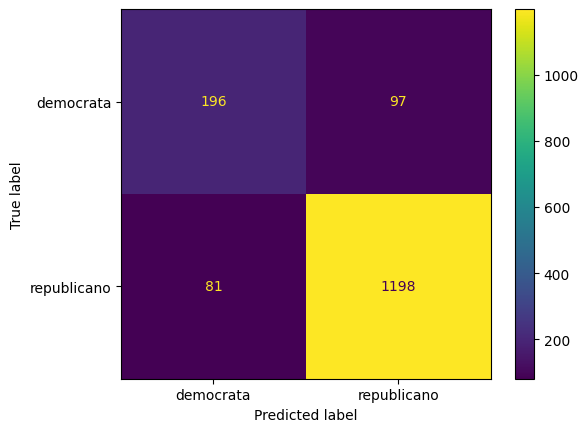

In [26]:
from sklearn import metrics

# La matriz de confusión, gráficamente
metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred_label);

In [27]:
# mostrar precision, recall y f1_score para cada clase. Exactitud total, para cada clase y ponderada.
# False: mayoría demócrata
# True: mayoría republicana
print(metrics.classification_report(y_test_label, y_pred_label, digits=3))

              precision    recall  f1-score   support

   democrata      0.708     0.669     0.688       293
 republicano      0.925     0.937     0.931      1279

    accuracy                          0.887      1572
   macro avg      0.816     0.803     0.809      1572
weighted avg      0.885     0.887     0.886      1572



## Ejemplo 6.2 Explicabilidad
Intentemos deducir las reglas a partir de los nodos

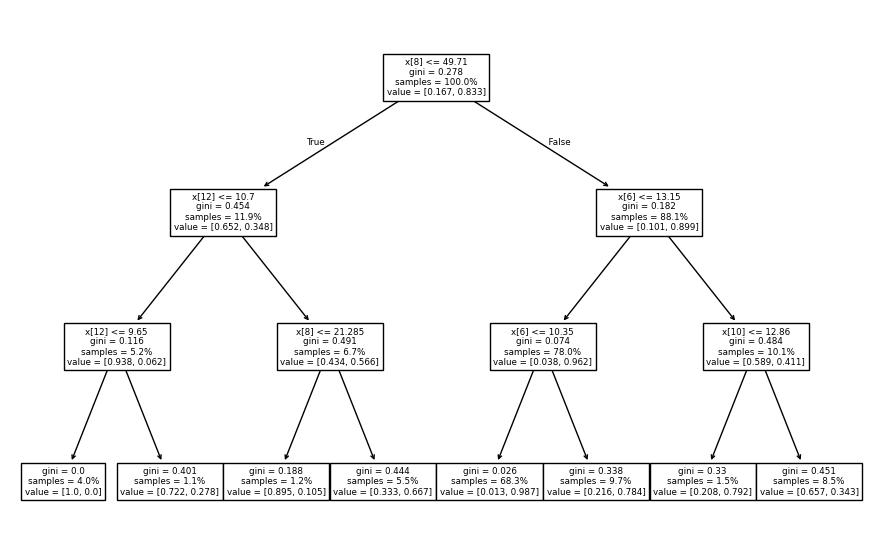

In [30]:
from sklearn import tree


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))
tree.plot_tree(model_tr, proportion=True, ax=ax);

## Ejemplo 6.3: Poda y ajuste

Entrenemos el mismo modelo sin restricciones en el número máximo de niveles y comparaemos los resultados

In [31]:
model_tr_nolimit = DecisionTreeClassifier()

# entrenamos el modelo
model_tr_nolimit.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred_nolimit = model_tr_nolimit.predict(X_test)

y_pred_nolimit_label = ["republicano" if x else "democrata" for x in y_pred_nolimit]


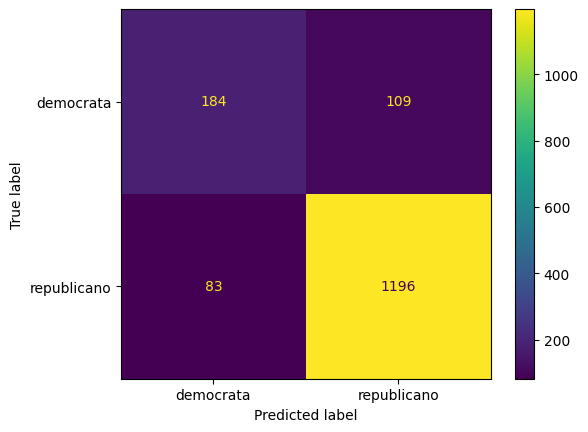

In [33]:
# La matriz de confusión, gráficamente
metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred_nolimit_label);

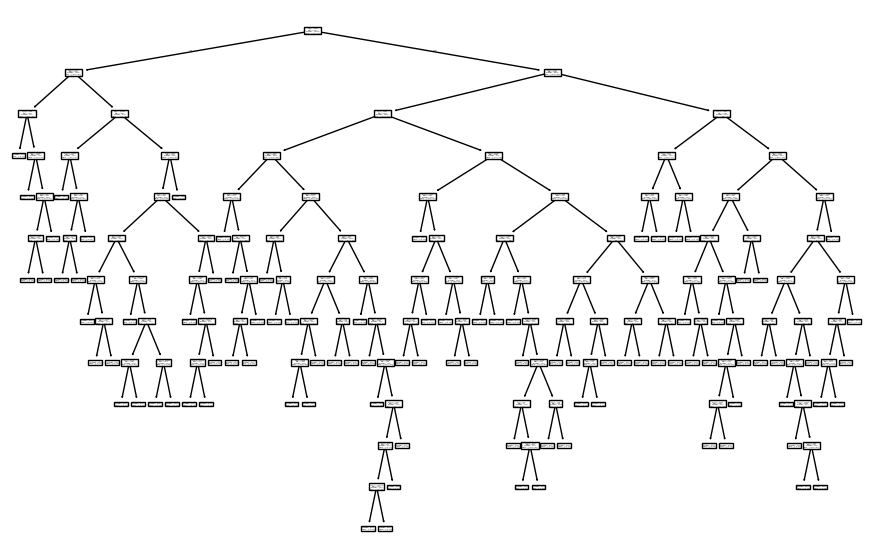

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))
tree.plot_tree(model_tr_nolimit, proportion=True, ax=ax);